# Week 3.1 Audio Features and Spotify Playlists 

For the second part of this week's lecture we are going to look at 

* The audio features that``Spotify's API`` will give us about **any track in its collection**


* How these can be used to make recommendations based on song similarity 


First we need to install the ``spotipy`` library. The Spotify API is just a ``REST API`` like we might have seen before, so we could access using the ``request`` library ourselves, but this just wraps up some stuff nicely for us!

In [14]:
## Install library 
!pip install spotipy

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
##These relate to an App on my developer account at Spotify and are used for authentication 
SPOTIPY_CLIENT_ID='4547ac9120de4cbba75a19ee6dc3b908'
SPOTIPY_CLIENT_SECRET='75fa035f5a0b47b7868e69a93ef878b4'

In [17]:
##First we authenticate
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

### Pick a playlist 

Now we need to pick a playlist to get some audio features for. 

To get the ``id``, sign into the [Spotify Web Player](https://open.spotify.com/) in your browser. When you have chosen a playlist (can be one of yours, or someone elses), the ``id`` will be the string of letters and numbers at the end of the ``URL``. 

In [18]:
#Put in the ID of a Spotify playlist of your choosing
playlist_id = '37i9dQZF1E37N8fLwgPeOc'

In [19]:
limit = 50
trim = True

In [20]:
#Get playlsit
playlist = sp.playlist(playlist_id)
#Extract tracks
tracks = playlist["tracks"]["items"]
if trim:
    tracks = tracks[-limit:]
#Extract track IDs
ids = [track["track"]["id"] for track in tracks]
#Get audio features for tracks
features =  pd.DataFrame(sp.audio_features(ids))    
#Label dataframe rows with track name and artist
labels = [track["track"]["artists"][0]["name"] + " - "+ track["track"]["name"] for track in tracks]
features.index = labels

In [21]:
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Lil Nas X - TALES OF DOMINICA,0.742,0.734,8,-5.582,0,0.0407,0.62900,0.003140,0.0834,0.5410,114.952,audio_features,5S4PZ7AuYlYiVIVik3wHUf,spotify:track:5S4PZ7AuYlYiVIVik3wHUf,https://api.spotify.com/v1/tracks/5S4PZ7AuYlYi...,https://api.spotify.com/v1/audio-analysis/5S4P...,146006,4
Olivia O'Brien - RIP (feat. G-Eazy & Drew Love),0.728,0.646,5,-4.387,0,0.0463,0.42200,0.000000,0.0899,0.4600,103.983,audio_features,3qjf2YP8G2RNFanYZDcZUk,spotify:track:3qjf2YP8G2RNFanYZDcZUk,https://api.spotify.com/v1/tracks/3qjf2YP8G2RN...,https://api.spotify.com/v1/audio-analysis/3qjf...,200773,4
"benny blanco - I Can’t Get Enough (benny blanco, Selena Gomez, J Balvin, Tainy)",0.541,0.468,10,-4.039,0,0.3620,0.40400,0.000004,0.3580,0.6900,95.266,audio_features,1WSGTYKLEpKfNQYYW5Oymt,spotify:track:1WSGTYKLEpKfNQYYW5Oymt,https://api.spotify.com/v1/tracks/1WSGTYKLEpKf...,https://api.spotify.com/v1/audio-analysis/1WSG...,158027,4
Khalid - Love Lies - Snakehips Remix,0.388,0.837,6,-3.022,1,0.1070,0.02290,0.000002,0.1490,0.3780,143.271,audio_features,5K7fJJAj8JDm2JfAYyQk9F,spotify:track:5K7fJJAj8JDm2JfAYyQk9F,https://api.spotify.com/v1/tracks/5K7fJJAj8JDm...,https://api.spotify.com/v1/audio-analysis/5K7f...,202935,4
Lauv - i'm so tired...,0.548,0.735,11,-7.572,1,0.2360,0.17300,0.000000,0.1950,0.4980,101.252,audio_features,7LpMG3AEaIJgs62HQhAa91,spotify:track:7LpMG3AEaIJgs62HQhAa91,https://api.spotify.com/v1/tracks/7LpMG3AEaIJg...,https://api.spotify.com/v1/audio-analysis/7LpM...,162587,4
Justin Bieber - Lonely (with benny blanco),0.619,0.241,11,-7.102,0,0.0460,0.90000,0.000000,0.1160,0.0719,79.461,audio_features,3S8jK1mGzQi24ilFb45DAZ,spotify:track:3S8jK1mGzQi24ilFb45DAZ,https://api.spotify.com/v1/tracks/3S8jK1mGzQi2...,https://api.spotify.com/v1/audio-analysis/3S8j...,149190,4
Aries - ONE PUNCH,0.643,0.617,4,-5.217,1,0.0405,0.13100,0.000000,0.2580,0.4320,87.502,audio_features,4URdynWUR50mXggi06ilrJ,spotify:track:4URdynWUR50mXggi06ilrJ,https://api.spotify.com/v1/tracks/4URdynWUR50m...,https://api.spotify.com/v1/audio-analysis/4URd...,145371,4
Zara Larsson - Ruin My Life,0.608,0.710,11,-4.998,1,0.0636,0.43000,0.000000,0.0903,0.6130,124.985,audio_features,4nyY8oVjbX2d4qzlpiVM5n,spotify:track:4nyY8oVjbX2d4qzlpiVM5n,https://api.spotify.com/v1/tracks/4nyY8oVjbX2d...,https://api.spotify.com/v1/audio-analysis/4nyY...,190051,4
Tones And I - Dance Monkey,0.824,0.587,6,-6.401,0,0.0937,0.69000,0.000105,0.1490,0.5140,98.029,audio_features,2N8m6CYs74qQO4mjVcXO30,spotify:track:2N8m6CYs74qQO4mjVcXO30,https://api.spotify.com/v1/tracks/2N8m6CYs74qQ...,https://api.spotify.com/v1/audio-analysis/2N8m...,209438,4
Chelsea Cutler - The Reason,0.407,0.607,2,-8.562,1,0.1890,0.10000,0.000056,0.3100,0.3390,90.049,audio_features,41nihGw6vE5iB5SjdyzadQ,spotify:track:41nihGw6vE5iB5SjdyzadQ,https://api.spotify.com/v1/tracks/41nihGw6vE5i...,https://api.spotify.com/v1/audio-analysis/41ni...,184667,4


### Audio Features 

What audio features do we get? You can check out the [Spotify API Documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

Some relate to known musical features such as ``key``, ``mode``,``tempo`` and ``time_signature``. 

Some are more related to the signal of the audio file itself (``loudness``, ``duration_ms``).

Some are more descriptive (``danceability``, `liveness` etc..). As these are self defined by Spotify, how subjective do you think these ones might be?

In [22]:
#Check out features
features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [23]:
#Drop columns that are not audio features
my_features = ['danceability', 'energy', 'key', 
            'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 
            'time_signature']
features = features[my_features]
features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Lil Nas X - TALES OF DOMINICA,0.742,0.734,8,-5.582,0,0.0407,0.62900,0.003140,0.0834,0.5410,114.952,146006,4
Olivia O'Brien - RIP (feat. G-Eazy & Drew Love),0.728,0.646,5,-4.387,0,0.0463,0.42200,0.000000,0.0899,0.4600,103.983,200773,4
"benny blanco - I Can’t Get Enough (benny blanco, Selena Gomez, J Balvin, Tainy)",0.541,0.468,10,-4.039,0,0.3620,0.40400,0.000004,0.3580,0.6900,95.266,158027,4
Khalid - Love Lies - Snakehips Remix,0.388,0.837,6,-3.022,1,0.1070,0.02290,0.000002,0.1490,0.3780,143.271,202935,4
Lauv - i'm so tired...,0.548,0.735,11,-7.572,1,0.2360,0.17300,0.000000,0.1950,0.4980,101.252,162587,4
Justin Bieber - Lonely (with benny blanco),0.619,0.241,11,-7.102,0,0.0460,0.90000,0.000000,0.1160,0.0719,79.461,149190,4
Aries - ONE PUNCH,0.643,0.617,4,-5.217,1,0.0405,0.13100,0.000000,0.2580,0.4320,87.502,145371,4
Zara Larsson - Ruin My Life,0.608,0.710,11,-4.998,1,0.0636,0.43000,0.000000,0.0903,0.6130,124.985,190051,4
Tones And I - Dance Monkey,0.824,0.587,6,-6.401,0,0.0937,0.69000,0.000105,0.1490,0.5140,98.029,209438,4
Chelsea Cutler - The Reason,0.407,0.607,2,-8.562,1,0.1890,0.10000,0.000056,0.3100,0.3390,90.049,184667,4


### Task 1 - Sort by Audio Features 

In order to get a feel for features and what they represent, we are now going to use them to sort the playlist. 

Try out some different features. 

* What do low and high values for the each of the features sound like? 


* Given your knowledge of the songs, does this feel correct? 


* If there is a feature you are not sure what it measures, are you able to get a better understanding by looking at the sorted tracks?


* Does this sorted order of the playlist flow well?


In [24]:
sort_by = 'liveness'
features.sort_values(by = sort_by, ascending = False)[:10]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Ellie Goulding - Close To Me,0.572,0.750,1,-5.042,0,0.0604,0.0946,0.000000,0.378,0.475,144.081,182627,4
"benny blanco - I Can’t Get Enough (benny blanco, Selena Gomez, J Balvin, Tainy)",0.541,0.468,10,-4.039,0,0.3620,0.4040,0.000004,0.358,0.690,95.266,158027,4
Lil Nas X - AM I DREAMING (feat. Miley Cyrus),0.629,0.445,3,-6.999,1,0.0258,0.7700,0.000003,0.351,0.209,94.103,183241,4
The Chainsmokers - Beach House,0.400,0.838,0,-4.491,1,0.0526,0.1740,0.000000,0.341,0.533,179.945,206120,4
Aries - BOUNTY HUNTER,0.623,0.487,9,-7.247,1,0.0398,0.0681,0.000000,0.319,0.285,84.989,152472,4
Chelsea Cutler - The Reason,0.407,0.607,2,-8.562,1,0.1890,0.1000,0.000056,0.310,0.339,90.049,184667,4
Lil Nas X - DEAD RIGHT NOW,0.685,0.717,0,-6.456,0,0.0411,0.1010,0.000019,0.266,0.549,127.963,221203,4
benny blanco - Bad Decisions (with BTS & Snoop Dogg),0.762,0.861,0,-3.296,1,0.0955,0.0185,0.000000,0.264,0.955,120.048,172714,4
Aries - ONE PUNCH,0.643,0.617,4,-5.217,1,0.0405,0.1310,0.000000,0.258,0.432,87.502,145371,4
Jonas Blue - Rise,0.687,0.785,1,-4.650,1,0.0333,0.3270,0.000000,0.203,0.655,106.046,194408,4


### Task 2 - Song Similarity 

Now lets investigate which songs in the playlist are similar to each other based on a given set of features. 

Change the features in ``my_subset_features`` and re-run the code each time. 

* Do you think songs that have **high cosine similarity** (e.g. close to 1) are similar songs? 


* Do different subsets of features make seem to provide better results in this regard?

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.preprocessing import StandardScaler

In [62]:
my_subset_features = ['danceability', 'energy',  'tempo']

In [63]:
#Get subset
subset_features = features[my_subset_features]
#Standardise
scaled_features = StandardScaler().fit_transform(subset_features)
#Get cosine distances
similarities = cosine(scaled_features)
#Visualise 
similarities = pd.DataFrame(similarities, columns = features.index, index = features.index)
similarities.style.background_gradient(cmap='Greens')

,Lil Nas X - TALES OF DOMINICA,Olivia O'Brien - RIP (feat. G-Eazy & Drew Love),"benny blanco - I Can’t Get Enough (benny blanco, Selena Gomez, J Balvin, Tainy)",Khalid - Love Lies - Snakehips Remix,Lauv - i'm so tired...,Justin Bieber - Lonely (with benny blanco),Aries - ONE PUNCH,Zara Larsson - Ruin My Life,Tones And I - Dance Monkey,Chelsea Cutler - The Reason,The Chainsmokers - Beach House,Jonas Blue - Rise,Lil Nas X - INDUSTRY BABY (feat. Jack Harlow),benny blanco - Unlearn (with Gracie Abrams),Zedd - Happy Now,NOTD - I Wanna Know (feat. Bea Miller),Marshmello - Happier,Khalid - OTW,Camila Cabello - Real Friends,Lil Nas X - THATS WHAT I WANT,benny blanco - Eastside (with Halsey & Khalid) - Acoustic,Zedd - The Middle,5 Seconds of Summer - Youngblood,Marshmello - Light It Up (with Tyga & Chris Brown),Bebe Rexha - Meant to Be (feat. Florida Georgia Line),Billie Eilish - bad guy (with Justin Bieber),Lil Nas X - DEAD RIGHT NOW,The Chainsmokers - This Feeling,Lubalin - double helix,Ellie Goulding - Close To Me,Aries - BOUNTY HUNTER,Khalid - Better,Avicii - SOS (feat. Aloe Blacc),Lil Nas X - Late To Da Party (F*CK BET) (feat. YoungBoy Never Broke Again),Juice WRLD - Real Shit (with benny blanco),benny blanco - You (with Marshmello & Vance Joy),Y2K - Lalala,Kid Cudi - Sad People,Rita Ora - Let You Love Me,Halsey - Without Me,Lil Nas X - Old Town Road - Remix,Khalid - Talk (feat. Disclosure),benny blanco - Graduation (with Juice WRLD),Jaden - BYE,Lauv - There's No Way,Lil Nas X - LIFE AFTER SALEM,Lil Nas X - SCOOP (feat. Doja Cat),benny blanco - Bad Decisions (with BTS & Snoop Dogg),Lil Nas X - AM I DREAMING (feat. Miley Cyrus),benny blanco - Roses (with Juice WRLD feat. Brendon Urie)
Lil Nas X - TALES OF DOMINICA,1.000000,0.731289,-0.755572,-0.164682,0.064904,-0.624632,0.074973,0.245611,0.550913,-0.541982,-0.150476,0.846917,0.450234,-0.939115,-0.039177,0.772203,0.796926,0.261335,-0.087591,0.821680,-0.192365,0.830249,0.510627,0.672278,0.304827,-0.584395,0.747750,-0.661066,-0.965740,0.073206,-0.395275,-0.510814,0.728854,0.056831,0.472146,-0.084895,-0.038843,-0.052853,0.107596,-0.096954,0.595683,0.097384,0.240361,-0.873558,0.336018,-0.703861,0.168254,0.960023,-0.568756,-0.312461
Olivia O'Brien - RIP (feat. G-Eazy & Drew Love),0.731289,1.000000,-0.179813,-0.654955,0.032259,0.070902,0.613040,-0.369273,0.911941,-0.297115,-0.765116,0.637634,-0.148943,-0.702453,0.075250,0.231484,0.693239,0.693086,0.614457,0.811852,0.528437,0.969865,0.004454,0.954293,-0.424288,-0.508431,0.094399,-0.210987,-0.606309,-0.608029,0.311576,0.098448,0.973986,0.024882,0.841162,0.610954,0.175979,-0.669016,-0.021048,-0.102220,0.408117,0.221775,-0.315493,-0.786127,-0.127225,-0.949199,-0.125992,0.530686,0.144725,-0.831760
"benny blanco - I Can’t Get Enough (benny blanco, Selena Gomez, J Balvin, Tainy)",-0.755572,-0.179813,1.000000,-0.087481,0.299151,0.856367,0.596386,-0.430123,-0.143286,0.787994,-0.326479,-0.433424,-0.923050,0.573161,0.469572,-0.703687,-0.303419,0.430325,0.590936,-0.278888,0.672410,-0.397037,-0.440017,-0.244378,-0.778412,0.086641,-0.938222,0.947202,0.732371,-0.501525,0.874276,0.948376,-0.278772,-0.416833,0.220630,0.653299,-0.151238,-0.601740,0.194020,-0.310976,-0.761890,-0.303506,-0.810270,0.699577,-0.829708,0.297273,-0.657401,-0.818088,0.889482,-0.372426
Khalid - Love Lies - Snakehips Remix,-0.164682,-0.654955,-0.087481,1.000000,0.604302,-0.567059,-0.312502,0.913897,-0.899290,0.470978,0.917836,0.157572,0.144111,-0.032653,0.478551,0.499004,0.090406,-0.245731,-0.796453,-0.090992,-0.752083,-0.653504,0.740112,-0.819893,0.644421,-0.291387,0.378838,0.176257,-0.084067,0.887066,-0.468520,-0.152695,-0.761650,-0.587982,-0.348952,-0.676555,-0.799374,0.506444,0.685851,-0.543525,-0.546970,-0.770267,0.135130,0.574352,-0.086132,0.803392,-0.289973,0.112715,-0.533012,0.537030
Lauv - i'm so tired...,0.064904,0.032259,0.299151,0.604302,1.000000,-0.163758,0.554996,0.573043,-0.353430,0.787330,0.245483,0.584167,-0.506797,-0.402463,0.979286,0.466288,0.628706,0.623637,-0.07

### Task 3 - Top N Recommendations

Now we're going to use the ``cosine similarity`` to make some recommedations! 

Pick a track (``artist - title``) and see which ``n`` songs are closed to it.

* Are these good recommendations based on the seed track?


* For higher values of n, how far before the recommendations start getting irrelevant?


* Again, try different subsets of features (you will need to go back to Task 2 and run the code again)

In [64]:
track = "Khalid - Better"

In [65]:
#How many tracks to recommend
n = 20

In [66]:
similarities.sort_values(by = track, ascending=False)[track].index[1:n+1]

Index(['benny blanco - I Can’t Get Enough (benny blanco, Selena Gomez, J Balvin, Tainy)',
       'Aries - BOUNTY HUNTER', 'The Chainsmokers - This Feeling',
       'Lil Nas X - AM I DREAMING (feat. Miley Cyrus)', 'Aries - ONE PUNCH',
       'Justin Bieber - Lonely (with benny blanco)',
       'Chelsea Cutler - The Reason',
       'benny blanco - You (with Marshmello & Vance Joy)',
       'benny blanco - Eastside (with Halsey & Khalid) - Acoustic',
       'Camila Cabello - Real Friends', 'Khalid - OTW', 'Zedd - Happy Now',
       'Jaden - BYE', 'Juice WRLD - Real Shit (with benny blanco)',
       'Lubalin - double helix', 'Lauv - i'm so tired...',
       'Rita Ora - Let You Love Me',
       'benny blanco - Unlearn (with Gracie Abrams)',
       'Olivia O'Brien - RIP (feat. G-Eazy & Drew Love)',
       'Lil Nas X - LIFE AFTER SALEM'],
      dtype='object')

### Task 4 - PCA Visualisation

Do songs near each other sound the same? Given one, would the nearby songs make good recommendations?

You may have to reduce the size of ``subset_features`` (and re-run code from Task 2 again) if there are too many songs to see properly!

In [40]:
num_dimensions = 2 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
reduced_features = pca.fit_transform(scaled_features)

<Figure size 576x576 with 0 Axes>

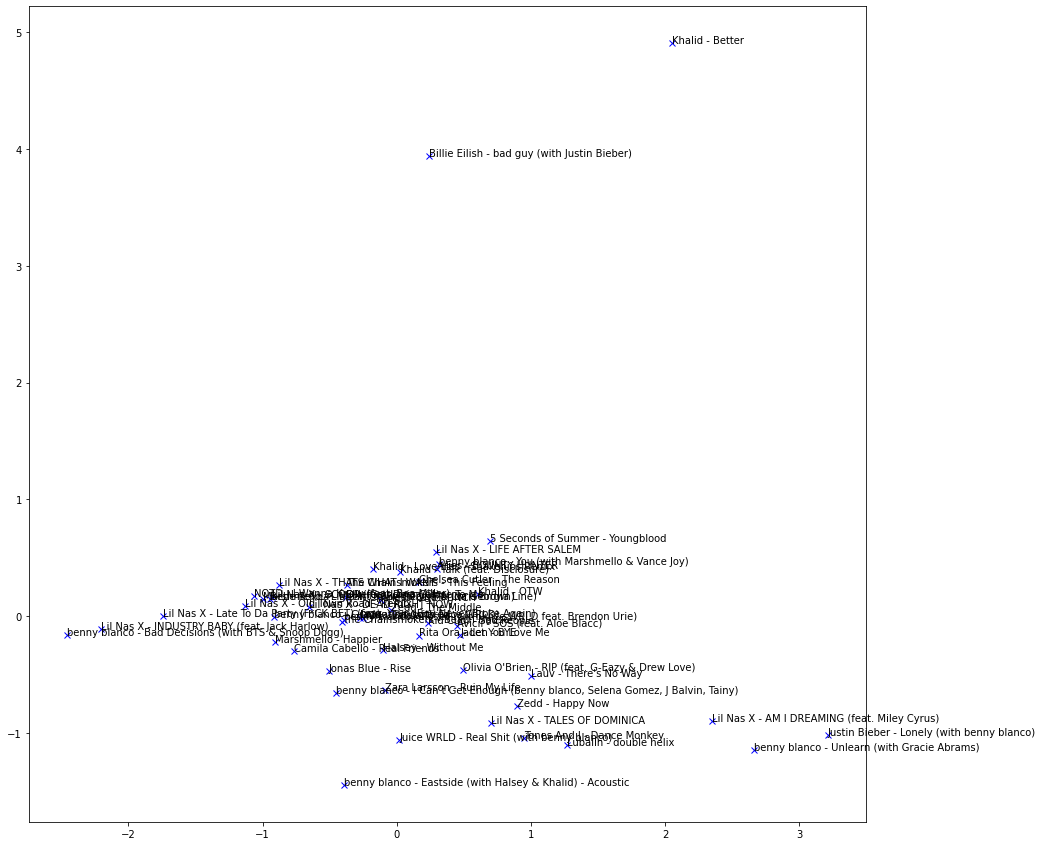

In [43]:
#Plot
plt.figure(figsize=(8, 8))
fig,ax = plt.subplots(figsize=(15,15))
x = reduced_features[:,0]
y = reduced_features[:,1]
ax.plot(x,y,"bx")
annotations = subset_features.index
for i, label in enumerate(annotations):
    ax.annotate(label, (x[i], y[i]),alpha=1)